<a href="https://colab.research.google.com/github/weilipan/MachineLearing/blob/main/1_3%E7%B7%B4%E7%BF%92%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#練習題一

1. 下載pokemon檔案。
```
#下載寶可夢檔案
!wget pokemon.csv https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv
```
2. 針對HP,Attack,...,Speed欄位，繪製箱型圖。  
3. 針對Attack,Defense欄位繪製散點圖，並找出「攻防一體皆強」的pokemon。  
4. 找出Type 1=Fire的pokemon的HP平均值。  
5. 找出Type 1所有屬性pokemon的HP平均最高、最低值。  
6.選出Attack最高前五名的pokemon。  
7.選出Attack、Defense同時為前20名的pokemon。

In [3]:
!wget pokemon.csv https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv

--2023-03-27 05:17:54--  http://pokemon.csv/
Resolving pokemon.csv (pokemon.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘pokemon.csv’
--2023-03-27 05:17:54--  https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44028 (43K) [text/plain]
Saving to: ‘pokemon.csv’

pokemon.csv         100%[===================>]  43.00K  --.-KB/s    in 0.01s   

2023-03-27 05:17:54 (3.90 MB/s) - ‘pokemon.csv’ saved [44028/44028]

FINISHED --2023-03-27 05:17:54--
Total wall clock time: 0.2s
Downloaded: 1 files, 43K in 0.01s (3.90 MB/s)


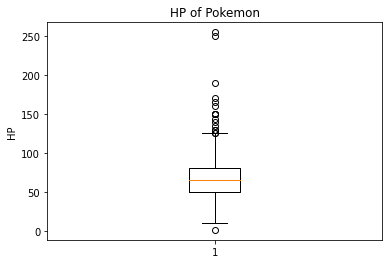

In [ ]:
# 針對HP,Attack,...,Speed欄位，繪製箱型圖。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('pokemon.csv')
plt.boxplot(df['HP'])
plt.ylabel('HP')
plt.title('HP of Pokemon')
plt.show()

In [ ]:
# 針對HP,Attack,...,Speed欄位，繪製箱型圖。
import pandas as pd
import numpy as np
import plotly.express as px
df=pd.read_csv('pokemon.csv')
fig=px.box(df,y='HP',x='Type 1') #用Type 1分類
fig.show()

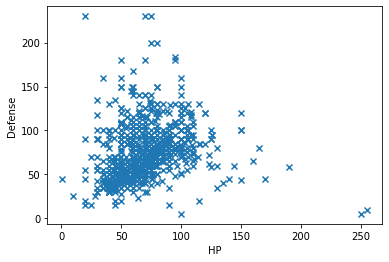

In [ ]:
# 針對Attack,Defense欄位繪製散點圖，並找出「攻防一體皆強」的pokemon。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('pokemon.csv')
plt.scatter(df['HP'],df['Defense'],marker='x')
plt.xlabel('HP')
plt.ylabel('Defense')
plt.show()

In [ ]:
# 針對Attack,Defense欄位繪製散點圖，並找出「攻防一體皆強」的pokemon。
import pandas as pd
import numpy as np
import plotly.express as px
df=pd.read_csv('pokemon.csv')
fig=px.scatter(df, x="HP", y="Defense", color="Type 1", symbol="Type 1",hover_data=['Name'])
fig.show()

In [ ]:
'''
找出Type 1=Fire的pokemon的HP平均值。
'''
import pandas as pd
import numpy as np
df=pd.read_csv('pokemon.csv')
df=df[df['Type 1']=='Fire'] #先篩選出Type 1=='Fire'
print(np.mean(df['HP'])) #HP平均

69.90384615384616


In [5]:
'''
找出Type 1所有屬性pokemon的HP平均最高、最低值。
'''
import pandas as pd
df=pd.read_csv('pokemon.csv')
sort_df=df.groupby('Type 1').mean().sort_values(by=['HP'],ascending=False)['HP']
print(sort_df)
print(sort_df.keys()[0],sort_df[0])
print(sort_df.keys()[-1],sort_df[-1])


Type 1
Dragon      83.312500
Normal      77.275510
Fairy       74.117647
Ground      73.781250
Water       72.062500
Ice         72.000000
Flying      70.750000
Psychic     70.631579
Fire        69.903846
Fighting    69.851852
Grass       67.271429
Poison      67.250000
Dark        66.806452
Rock        65.363636
Steel       65.222222
Ghost       64.437500
Electric    59.795455
Bug         56.884058
Name: HP, dtype: float64
Dragon 83.3125
Bug 56.88405797101449


In [17]:
'''
選出Attack最高前五名的pokemon。
'''
import pandas as pd
df=pd.read_csv('pokemon.csv')
df=df.sort_values('Attack',ascending=False)[:5]

print(df[['Name','Attack']])

                        Name  Attack
163      MewtwoMega Mewtwo X     190
232  HeracrossMega Heracross     185
424    GroudonPrimal Groudon     180
426    RayquazaMega Rayquaza     180
429       DeoxysAttack Forme     180


In [37]:
'''
選出Attack、Defense同時為前20名的pokemon。
'''
import pandas as pd
df=pd.read_csv('pokemon.csv')
df_Attack20=df.sort_values(by='Attack',ascending=False)[['Name','Attack']][:20]
df_Defense20=df.sort_values(by='Defense',ascending=False)[['Name','Defense']][:20]
print(df_Attack20)
print(df_Defense20)
df_intersect=df_Attack20.index.intersection(df_Defense20.index)
print(df_intersect)#利用兩個資料表的索引交集
print(df_Attack20.filter(items=df_intersect,axis=0)[['Name']])

                        Name  Attack
163      MewtwoMega Mewtwo X     190
232  HeracrossMega Heracross     185
424    GroudonPrimal Groudon     180
426    RayquazaMega Rayquaza     180
429       DeoxysAttack Forme     180
711       KyuremBlack Kyurem     170
494    GarchompMega Garchomp     170
527      GalladeMega Gallade     165
387      BanetteMega Banette     165
454                Rampardos     165
268  TyranitarMega Tyranitar     164
313                  Slaking     160
543                Regigigas     160
796      DiancieMega Diancie     160
798       HoopaHoopa Unbound     160
279    BlazikenMega Blaziken     160
137        PinsirMega Pinsir     155
141    GyaradosMega Gyarados     155
393          AbsolMega Absol     150
422      KyogrePrimal Kyogre     150
                        Name  Defense
230                  Shuckle      230
224      SteelixMega Steelix      230
333        AggronMega Aggron      230
223                  Steelix      200
414                 Regirock     

#練習題二
解線性聯立方程組最簡單的解法是利用線性代數的方法，請解下面的方程組：  
$ \left\{
    \begin{matrix}
        2x+3y-4z+w &=& 5\\
        x-2y+3z-2w &=& -3\\
        3x+5y+z-w &=& 20\\
        4x+y-z+w &=& 5\\
    \end{matrix}
\right. $
1. 寫出係數矩陣A。
2. 寫出常數矩陣B。
3. 找出係數矩陣的反矩陣 $A^{-1}$
4. 將$A^{-1}$與B相乘，即可得到解答（$x=A^{-1}B$）

**反矩陣方法 numpy.linalg.inv()**

In [39]:
import numpy as np
coarr=np.array([[2,3,-4,1],[1,-2,3,-2],[3,5,1,-1],[4,1,-1,1]])
print(coarr)

[[ 2  3 -4  1]
 [ 1 -2  3 -2]
 [ 3  5  1 -1]
 [ 4  1 -1  1]]


In [45]:
conarr=np.array([[5],[-3],[20],[5]])
print(conarr)

[[ 5]
 [-3]
 [20]
 [ 5]]


In [46]:
coinv=np.linalg.inv(coarr)
print(coinv)

[[ 0.04411765  0.13235294 -0.01470588  0.20588235]
 [-0.05147059 -0.15441176  0.18382353 -0.07352941]
 [-0.39705882 -0.19117647  0.13235294  0.14705882]
 [-0.52205882 -0.56617647  0.00735294  0.39705882]]


In [47]:
ans=coinv.dot(conarr)
print(ans)

[[0.55882353]
 [3.51470588]
 [1.97058824]
 [1.22058824]]
